In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

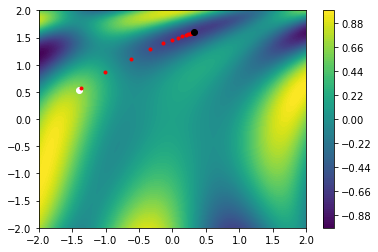

In [51]:
#func = lambda th: np.sin(1 / 2 * x**2 - 1 / 4 * y**2 + 3) * np.cos(2 * x + 1 - np.e**y)
func = lambda th: np.sin(1 / 2 * th[0]**2 - 1 / 4 * th[1]**2 + 3) * np.cos(2 * th[0] + 1 - np.e**th[1])

res = 100
_X = np.linspace(-2, 2, res) #En el eje X, queremos 100 coordenadas
_Y = np.linspace(-2, 2, res) #En el eje Y queremos 100 coordenadas

_Z = np.zeros((res, res)) #Este sería la matriz de 100 x 100

for ix, x in enumerate(_X):
    for iy, y in enumerate(_Y):
        _Z[iy, ix] = func([x, y]) #Aqui se agrega iy ix, para el orden de la matriz, en donde
                                    #el primer índice indica Eje Y, y el segundo Eje X.

plt.contourf(_X,_Y,_Z, 100) #Plotea la imagen completa con colores 
plt.colorbar() #Muestra la barra de colores y sus niveles positivos y negativos


Theta = np.random.rand(2) * 4 - 2 #Esto es porque la matriz está en [0,1], entonces se multiplica
                                #por 4 para que quede [0,4] y se restan 2, para que quede [-2,2]
_T = np.copy(Theta) #Se copia el número para utilizarlo en el bucle

h = 0.001 #Es la distancia entre vectores en el eje X
lr = 0.05 #Learning Rate

plt.plot(Theta[0], Theta[1], "o", c="white") 

grad = np.zeros(2) #[0,1]

for _ in range(1000):# Ocurrirán 1000 iteraciones o hasta encontrar el "camino"
    for it, th, in enumerate(Theta):
        _T = np.copy(Theta)
        _T[it] = _T[it] + h #Se le suma la distancia h
        deriv = (func(_T) - func(Theta)) / h #Se saca la derivada
        grad[it] = deriv #Se guarda la derivada en grad

    Theta = Theta - lr * grad #Theta el punto principal, se le resta el learning rate multiplicado
                                #por la gradiente.
        
    if(_ % 10 == 0): #Cada 10 iteraciones, se dibuja un punto rojo.
        plt.plot(Theta[0], Theta[1], ".", c="red")
        
plt.plot(Theta[0], Theta[1], "o", c="black") #Punto final del descenso de la gradiente
plt.show()